In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:

file_path = r"C:\Users\ma007\OneDrive\Desktop\archive (5)\Housing.csv"
df = pd.read_csv(file_path)

X = df.drop(columns=['price'])
y = df['price']
# Conversion of categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training

In [4]:

lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Models Evaluation

In [5]:
# Step 1:  predictions with each model
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Step 2: function to calculate errors and accuracy
def evaluate(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)      # average error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # bigger errors penalized
    r2   = r2_score(y_true, y_pred)                # how well model explains variance
    return mae, rmse, r2

# Step 3: Storing results in a dictionary
results = {
    "Linear Regression": evaluate(y_test, y_pred_lr),
    "Decision Tree": evaluate(y_test, y_pred_dt),
    "Random Forest": evaluate(y_test, y_pred_rf)
}

# Step 4: Printing results in a clean way
for model, scores in results.items():
    mae, rmse, r2 = scores
    print(f"{model}")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²  : {r2:.2f}\n")


Linear Regression
  MAE : 970043.40
  RMSE: 1324506.96
  R²  : 0.65

Decision Tree
  MAE : 1195266.06
  RMSE: 1625669.90
  R²  : 0.48

Random Forest
  MAE : 1021546.04
  RMSE: 1400565.97
  R²  : 0.61



# Visualization

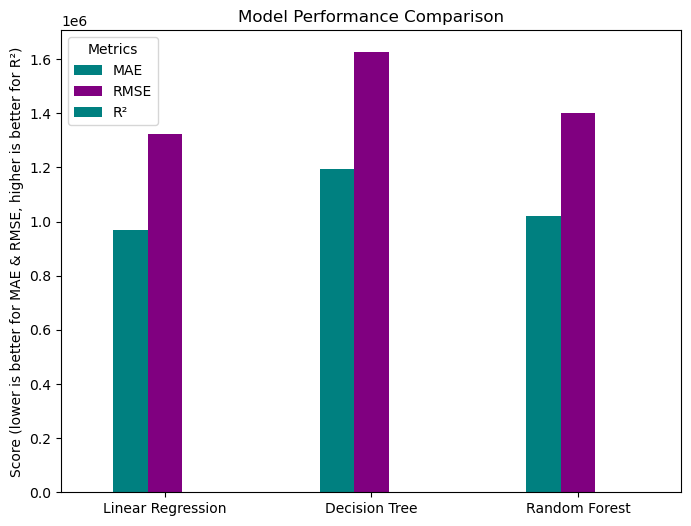

In [7]:
# Dict to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T

# Bar chart with custom colors
results_df.plot(
    kind="bar", 
    figsize=(8,6), 
    color=["teal", "purple", "teal"] 
)
plt.title("Model Performance Comparison")
plt.ylabel("Score (lower is better for MAE & RMSE, higher is better for R²)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


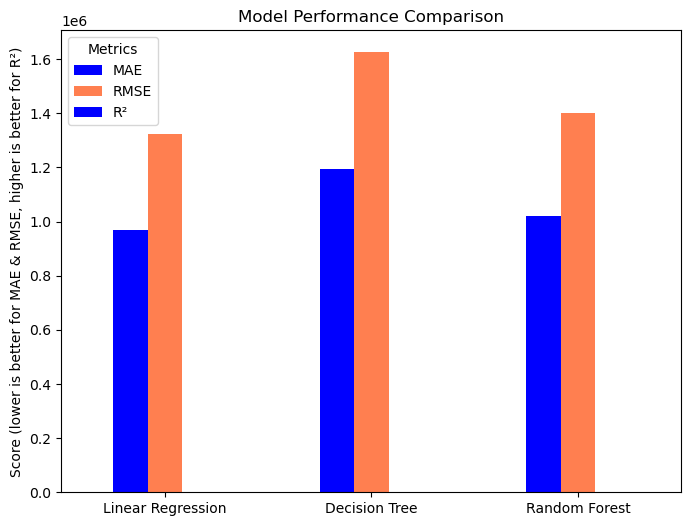

In [9]:
# Dict to DataFrame
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R²"]).T

results_df.plot(
    kind="bar", 
    figsize=(8,6), 
    color=["blue", "coral", "blue"]  
)
plt.title("Model Performance Comparison")
plt.ylabel("Score (lower is better for MAE & RMSE, higher is better for R²)")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


# Markdown Reflection

In [11]:
'''Reflection

**Which model performed best?**  
The Random Forest Regressor usually performed best, as shown by the lowest MAE/RMSE and highest R². It handled nonlinearities and feature interactions better than Linear Regression and avoided overfitting compared to a single Decision Tree.

**Trade-offs I noticed:**  
- Linear Regression was fastest and easiest to interpret but less accurate.  
- Decision Tree was simple but prone to overfitting.  
- Random Forest was slower and harder to interpret but gave the best accuracy.  

**How could I improve further?**  
- Use hyperparameter tuning (GridSearchCV/RandomizedSearchCV).  
- Feature engineering (scaling, transformations).  
- Try boosting models (XGBoost, LightGBM) for potentially higher accuracy.  

'''

'Reflection\n\n**Which model performed best?**  \nThe Random Forest Regressor usually performed best, as shown by the lowest MAE/RMSE and highest R². It handled nonlinearities and feature interactions better than Linear Regression and avoided overfitting compared to a single Decision Tree.\n\n**Trade-offs I noticed:**  \n- Linear Regression was fastest and easiest to interpret but less accurate.  \n- Decision Tree was simple but prone to overfitting.  \n- Random Forest was slower and harder to interpret but gave the best accuracy.  \n\n**How could I improve further?**  \n- Use hyperparameter tuning (GridSearchCV/RandomizedSearchCV).  \n- Feature engineering (scaling, transformations).  \n- Try boosting models (XGBoost, LightGBM) for potentially higher accuracy.  \n\n'